<a href="https://colab.research.google.com/github/SAMPADA-JADHAV/SampadaJadhav14/blob/master/ML_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS OF CAR FEATURES**

**1 . Importing the required libraries for EDA**

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns                                #visualisation
import matplotlib.pyplot as plt                      #visualisation
%matplotlib inline 
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (10,5) 

In [4]:
#loading the data into the data frame.
CData = pd.read_csv("data.csv")
# To display the top 5 rows
CData.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# To display the bottom 5 rows
CData.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
#to print the full summary
CData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# Checking the data type
CData.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [8]:
#Statistical summary
CData.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
#Shape - number of elements in each dimension
CData.shape

(11914, 16)

In [10]:
#NULL values
d=CData.isnull().sum()
d

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**2 . Dropping irrelevant columns**

From the above output we can clearly see that there are maximum number of null values are in the '**Market Category**' column.

As we know the **number of doors** of a car cannot decide the price of the car.

**Engine fuel type** also doesnt help to decide price of car.


In [11]:
#Dropping less relevance columns
CData = CData.drop(['Market Category' , 'Number of Doors','Engine Fuel Type'] , axis = 1)

In [12]:
#to print the full summary after dropping less relevance columns
CData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   highway MPG        11914 non-null  int64  
 10  city mpg           11914 non-null  int64  
 11  Popularity         11914 non-null  int64  
 12  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


**3 . Renaming the columns**

In [13]:
CData.rename(columns = { "Engine HP": "HP", "Engine Cylinders": "Cylinders",
                          "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H",
                          "city mpg": "MPG-C", "MSRP": "Price"}, inplace = True) 

In [14]:
#to print the full summary after renaming columns
CData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Popularity     11914 non-null  int64  
 12  Price          11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


**4 . Checking & removing any duplicates , null values ,missing data.**


In [15]:
# Rows containing duplicate data
duplicate_rows = CData[CData.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (792, 13)


In [16]:
#checking number of elements in each dimension before removing duplicates
CData.shape

(11914, 13)

In [17]:
# Dropping the duplicates 
CData=CData.drop_duplicates()

In [18]:
#checking number of elements in each dimension after removing duplicates
CData.shape

(11122, 13)

In [19]:
#checking null values
print(CData.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [20]:
# Dropping the missing values.
CData=CData.dropna()
CData.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [21]:
# After dropping the values
CData.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

**5 . Plotting graph for columns and checking for the outliers and removing them**

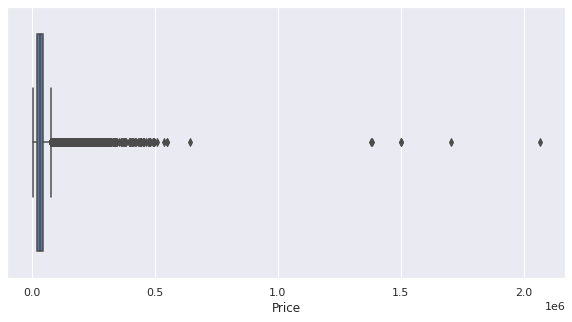

In [22]:
sns.boxplot(x=CData['Price'])

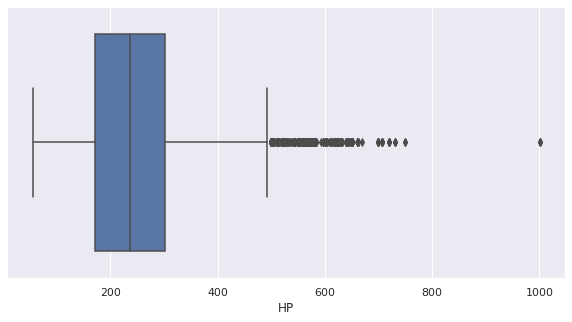

In [23]:
sns.boxplot(x=CData['HP'])

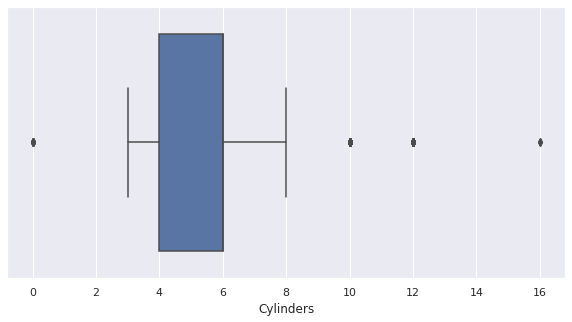

In [24]:
sns.boxplot(x=CData['Cylinders'])

In [25]:
#Find IQR
Q1=CData.quantile(0.25)
Q3=CData.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [26]:
#Remove the Outliners
CData=CData[~((CData<(Q1-1.5*IQR)) | (CData>(Q3+1.5*IQR))).any(axis=1)]
CData.shape


(8546, 13)

**6 . What are the most represented car brands ?**

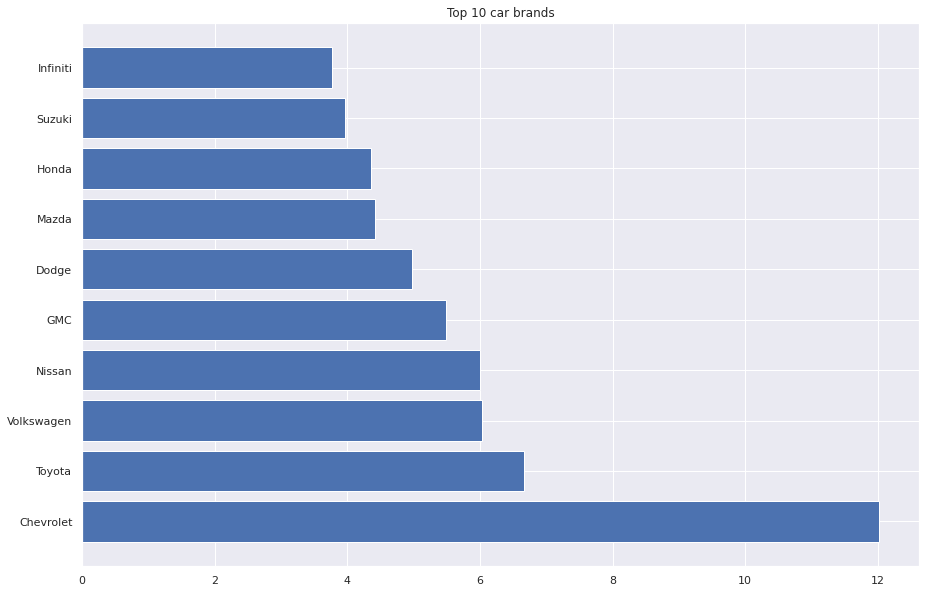

In [27]:
#Percentage of car per brand
counts=CData['Make'].value_counts()*100/sum(CData['Make'].value_counts())

#Top 10 car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(15,10))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

In [28]:
#finding average price for top car brands
Prices=CData[['Make','Price']].loc[(CData['Make']=='Chevrolet')|
              (CData['Make']=='Ford')|
              (CData['Make']=='Volkswagen')|
              (CData['Make']=='Toyota')|
              (CData['Make']=='Dodge')|
              (CData['Make']=='Nissan')|
              (CData['Make']=='GMC')|
              (CData['Make']=='Honda')|
              (CData['Make']=='Mazda')].groupby('Make').mean()
print(Prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


**7 . Plotting the correlation matrix**

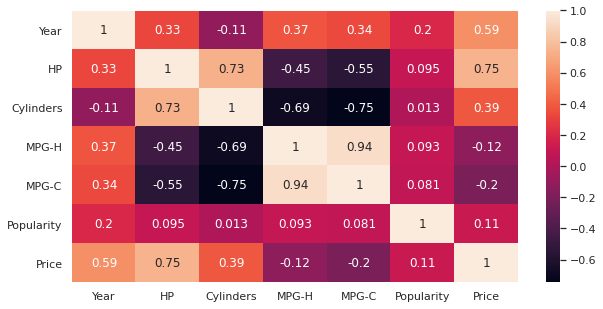

In [29]:
corrMatrix=CData.corr()
sns.heatmap(corrMatrix,annot=True)

What we understand by the above correlation matrix is that-

1 . The MPG-H and MPG-C are negatively dependent on Cylinders, that means as the cylinders in a car increases the mileage on highway and city highly decrease i,e Cylinders and MPG-H, MPG-C are inversely proportional to each other.

2 . The Price and HP(Horse power) are positively dependent on each other which means that the price and HP are directly proportional to each other i,e as the Horse power of a car increases the price for that car also increases.

3 . The HP(Horse Power) and the cylinders are positively dpendent i,e as the Cylinders for a car increases the Horse power for that car also increases.

4 . The Year and Price are positively dependent which means price for a car increases as the changes(or increases), because after a year are upgradation for some certain cars which reaults in the increases in price

**8. Plotting different graphs with respect to price of the cars and other attributes of the cars**

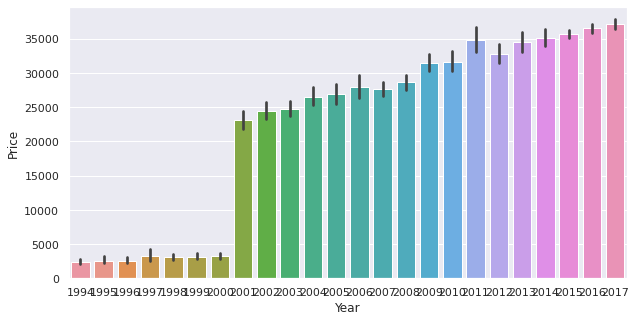

In [30]:
#Plotting bar graph for 'Price' with respect to 'Year'
sns.barplot(x=CData['Year'],y=CData['Price'])

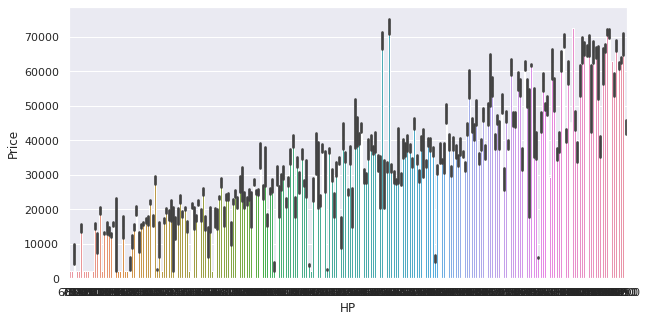

In [31]:
#Plotting bar graph for 'Price' with respect to 'HP'
sns.barplot(x=CData['HP'],y=CData['Price'])

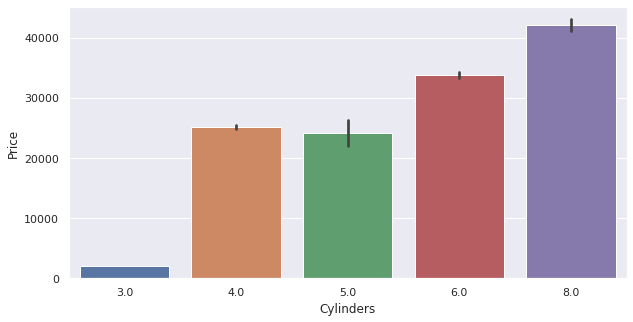

In [32]:
#Plotting bar graph for 'Price' with respect to 'Cylinders'
sns.barplot(x=CData['Cylinders'],y=CData['Price'])

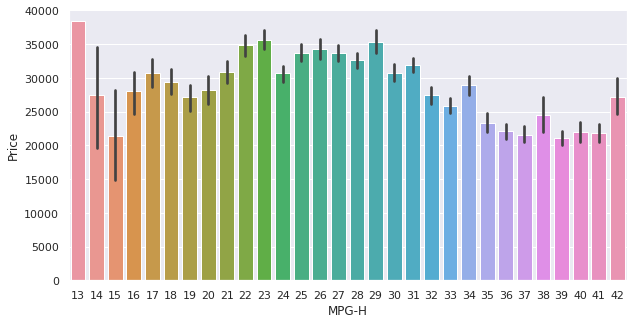

In [33]:
#Plotting bar graph for 'Price' with respect to 'MPG-H'
sns.barplot(x=CData['MPG-H'],y=CData['Price'])

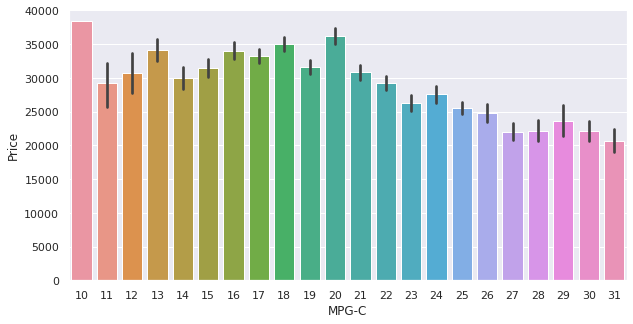

In [34]:
#Plotting bar graph for 'Price' with respect to 'MPG-C'
sns.barplot(x=CData['MPG-C'],y=CData['Price'])

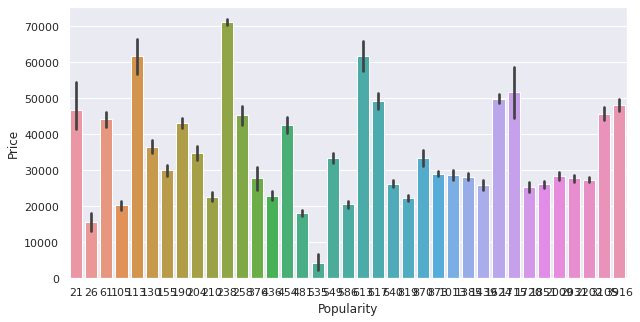

In [35]:
#Plotting bar graph for 'Price' with respect to 'Popularity'
sns.barplot(x=CData['Popularity'],y=CData['Price'])

**9. Splitting the dataset into 80 and 20 ratio and building a Machine Learning model with Price as target variable**

In [36]:
dcc=CData.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [38]:
#Importing the Label Encoder to Encode the Categorical data
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc=LabelEncoder()
for i in dcc:
  CData[i]=label_enc.fit_transform(CData[i])
print('Label Encoded Data')
CData.head()

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


In [39]:
a = CData[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
b = CData['Price'].values

In [40]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc_a = StandardScaler()
sc_b = StandardScaler()
a = sc_a.fit_transform(a)
b = sc_b.fit_transform(b.reshape(-1,1))

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(a,b,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6836, 6) (6836, 1)
(1710, 6) (1710, 1)


In [53]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

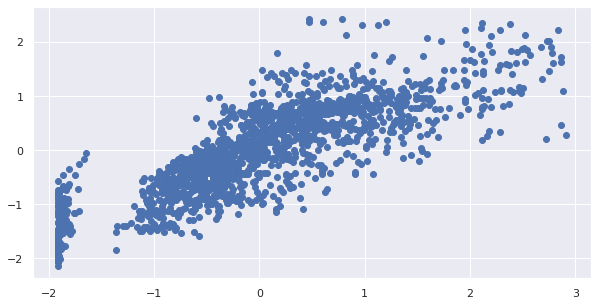

In [54]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

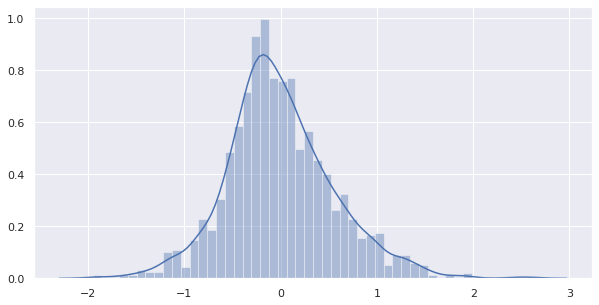

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


**10 . Using different algorithms checking performance over the metrics like R square, MAE, RMSE .**

In [57]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

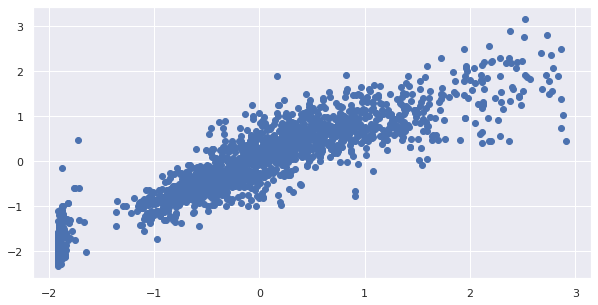

In [58]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

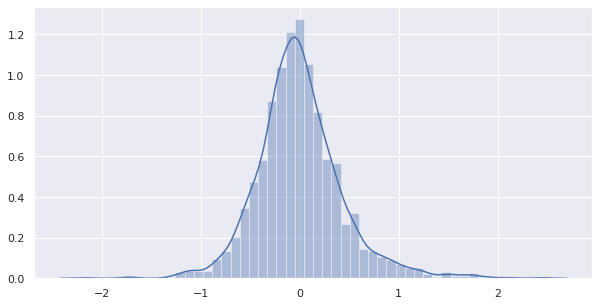

In [59]:
sns.distplot((y_test-y_pred),bins=50)

In [60]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.31573061752350967
RMSE: 0.4351456478672659
R SQUARE: 0.8053160242314694


In [61]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

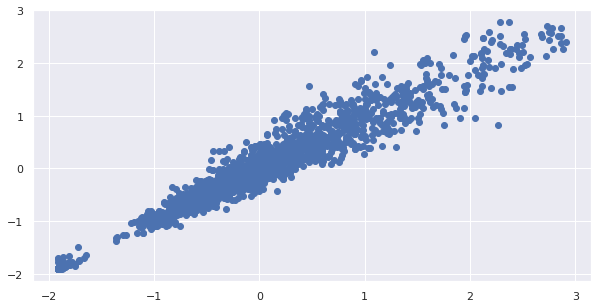

In [62]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

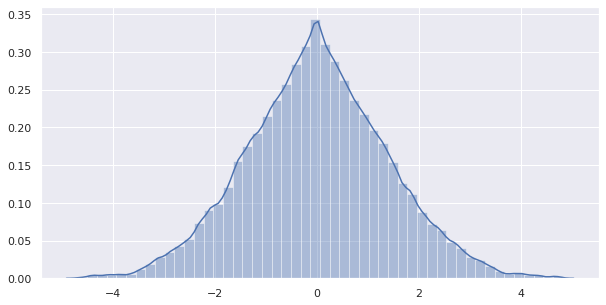

In [63]:
sns.distplot((y_test-y_pred),bins=50)

In [64]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.17769704010247667
RMSE: 0.24743996001244517
R SQUARE: 0.9370492959370332


In [65]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

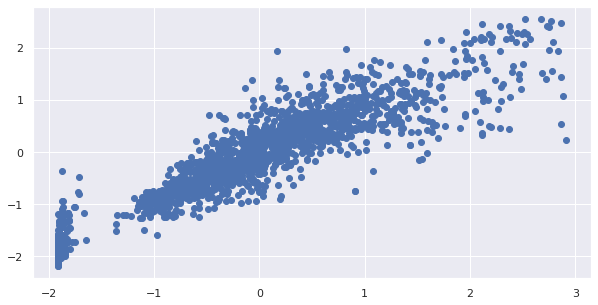

In [66]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

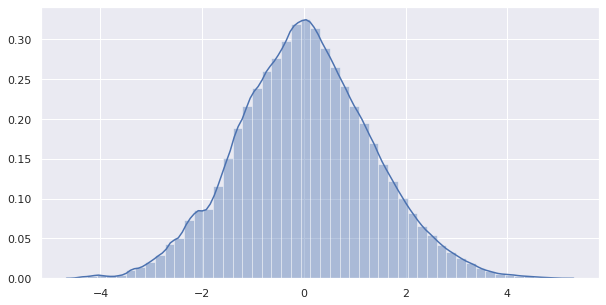

In [67]:
sns.distplot((y_test-y_pred),bins=50)

In [68]:
print("SCORES :")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R SQUARE:', metrics.r2_score(y_test, y_pred))

SCORES :
MAE: 0.29633619416546725
RMSE: 0.42527355451237575
R SQUARE: 0.814049362176249


Random Forest Regression algorithm fits the dataset accurately than other algorithms.